In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from sklearn.datasets import load_iris

data1 = load_iris()

data1['data']

df = pd.DataFrame(data1['data'], columns=data1['feature_names'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# Custom purple shades (you can tweak these hex codes)
purplePalette = ["#f2c1d1", "#a05fa1", "#2d043b"]

# Set the palette globally for Seaborn
sns.set_palette(purplePalette)

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
df.info() #No null values can be seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Exploratory Data Analysis

<Axes: >

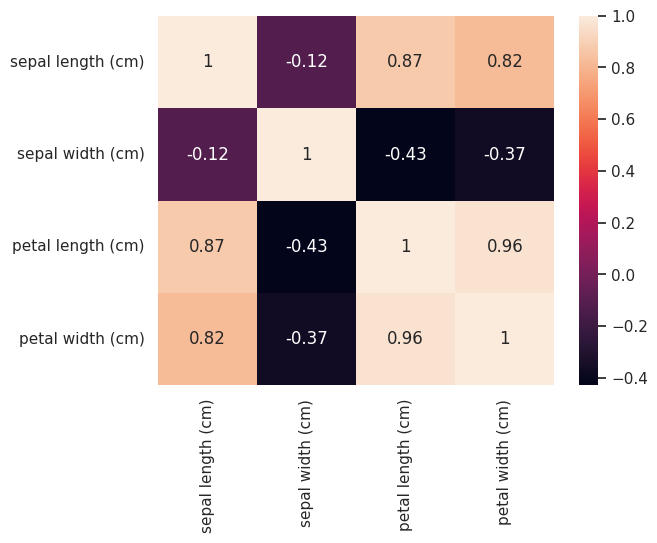

In [18]:
sns.heatmap(df.corr(), annot=True) # A lot of columns are highly correlated with each other

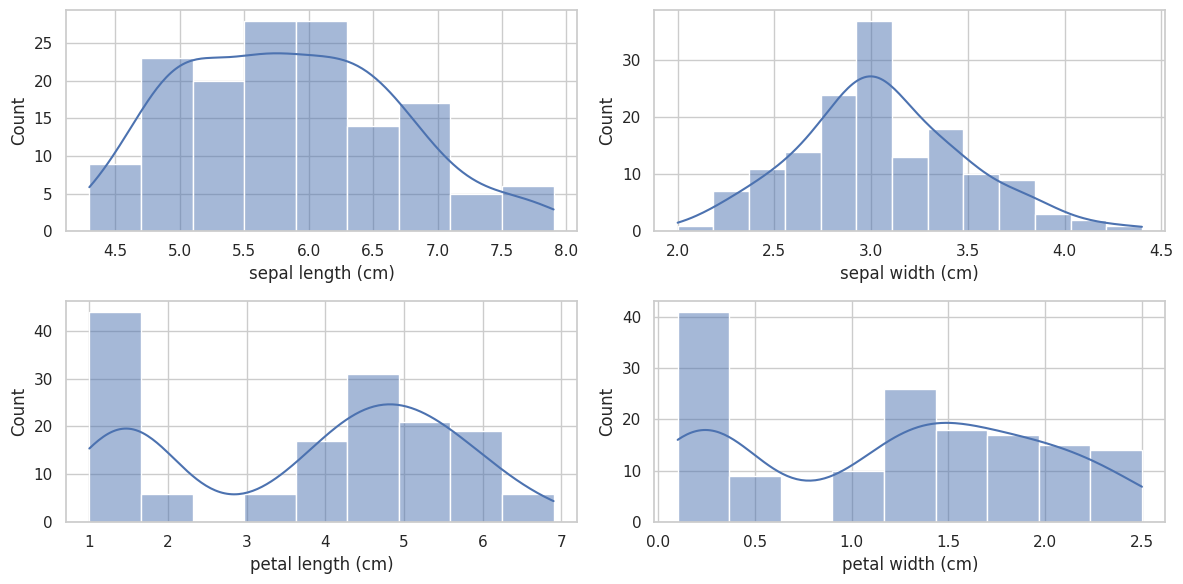

In [19]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

for x,y in enumerate(df):
  # print(y)
  sns.histplot(df[y], ax=axes[x], kde=True)

plt.tight_layout() # to avoid overlap of text we use plt.tight_layout

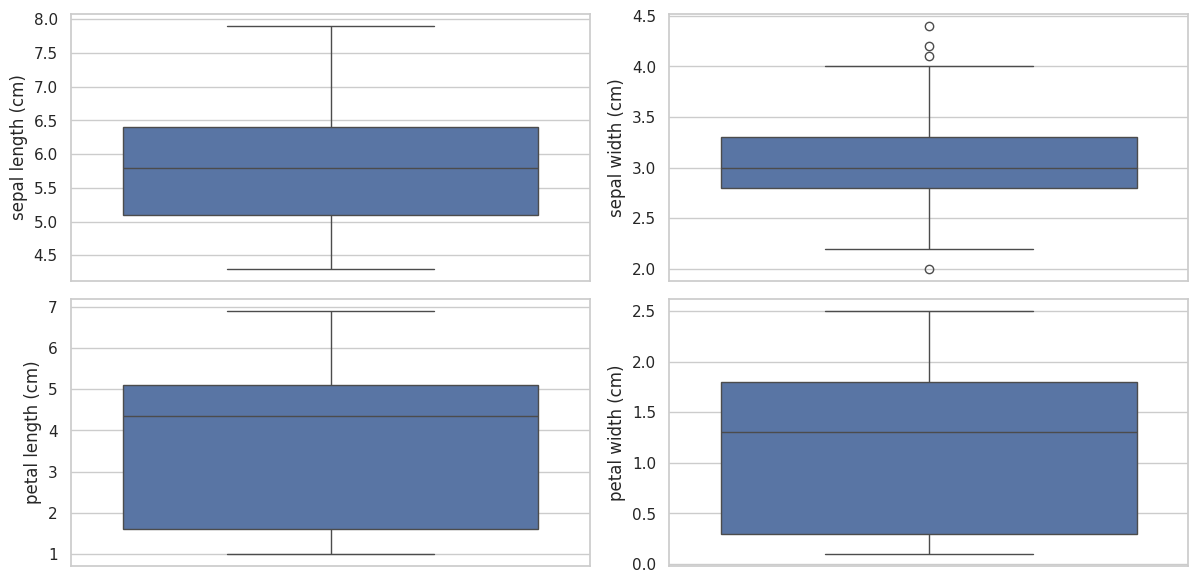

In [20]:

fig, axes = plt.subplots(2, 2, figsize=(12,6))
axes = axes.flatten()

for x,y in enumerate(df):
  sns.boxplot(df[y], ax = axes[x])

plt.tight_layout()

## Using IQR to find and remove ourliers

In [21]:

for x in df:
  print(x)
  Q1 = df[x].quantile(.25)
  Q3 = df[x].quantile(.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 - 1.5 * IQR

  lower,upper

  display(df[(df[x] < lower) & (df[x] > upper)])
  print()
  print()


#No outliers could be seen in any of the columns

sepal length (cm)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)




sepal width (cm)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)




petal length (cm)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)




petal width (cm)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


## Model

###Kmeans

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815, 50.16408239949711, 45.756864489676985, 40.781106837606856, 32.25257581453635, 28.37772592383463, 26.443016290726813]


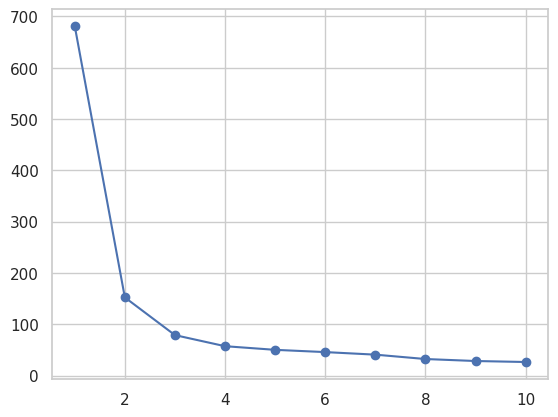

In [22]:
from sklearn.cluster import KMeans

X = df
#using elbow method
wcss = []
for x in range(1,11):
  # print(x)
  km1 = KMeans(n_clusters=x, init='k-means++')
  km1.fit(X)
  wcss.append(km1.inertia_)

plt.plot(range(1,11), wcss, marker='o')


print(wcss)


Elbow method shows that there should be 2 cluters, lets check this by visualizing the data using PCA

In [23]:
#setting the value of k as 3
X = df

km1 = KMeans(n_clusters=3, init='k-means++')
km1.fit(X)
predictedVal1 = km1.predict(X)

predictedVal1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [24]:
df['Predicted Values'] = predictedVal1

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted Values
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


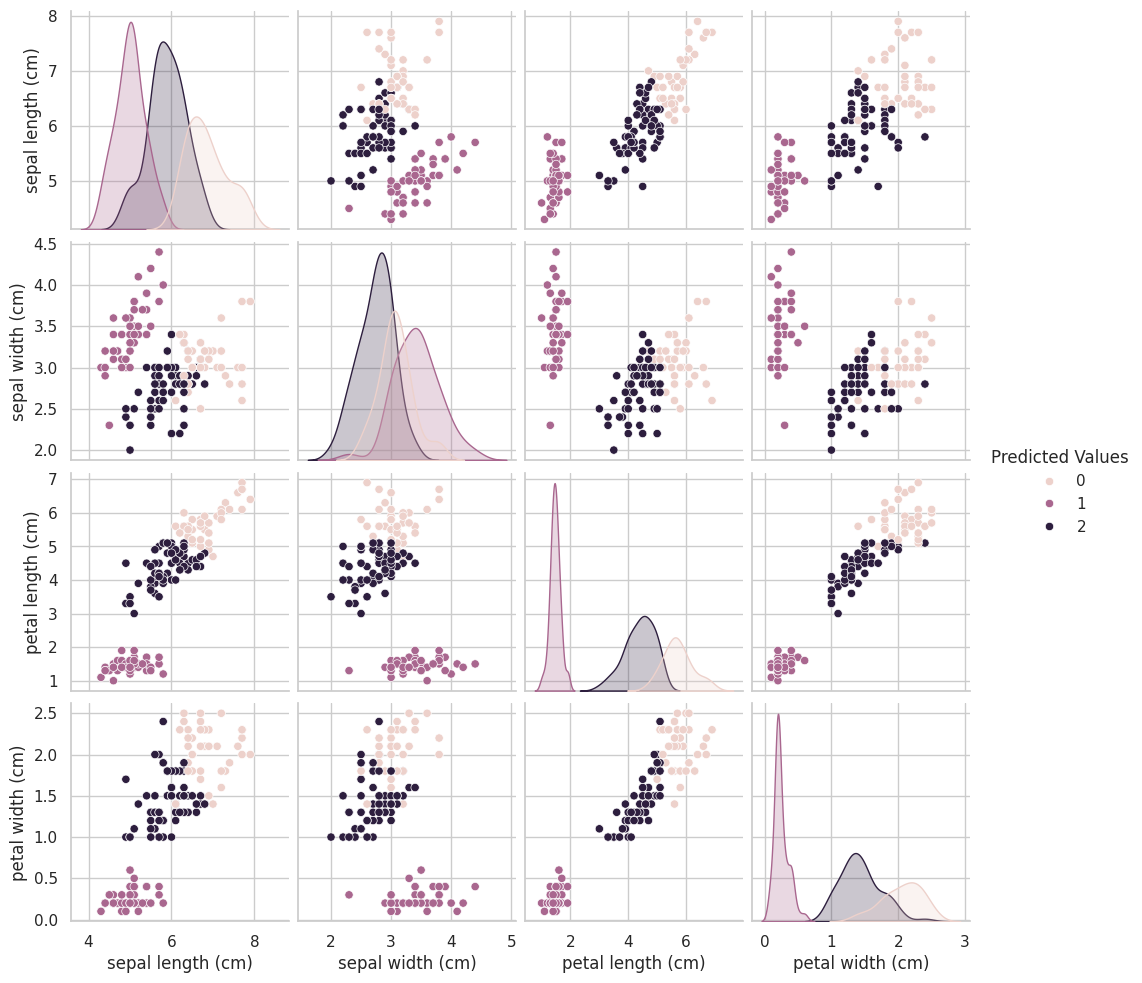

In [25]:
sns.pairplot(df, hue='Predicted Values')


In [26]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, km1.labels_)

score

np.float64(0.68468524942902)

## DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

db1 = DBSCAN()

db1.fit(X)

db1.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  2,  1,
        2,  2,  2, -1, -1,  2, -1, -1,  2,  2,  2,  1,  1,  2,  2, -1, -1,
        1,  2,  1, -1,  1,  2,  2,  1,  1,  2,  2,  2, -1,  2,  1, -1, -1,
        2,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  2,  2,  1])

In [28]:
df['Predicted Values'] = db1.labels_

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted Values
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


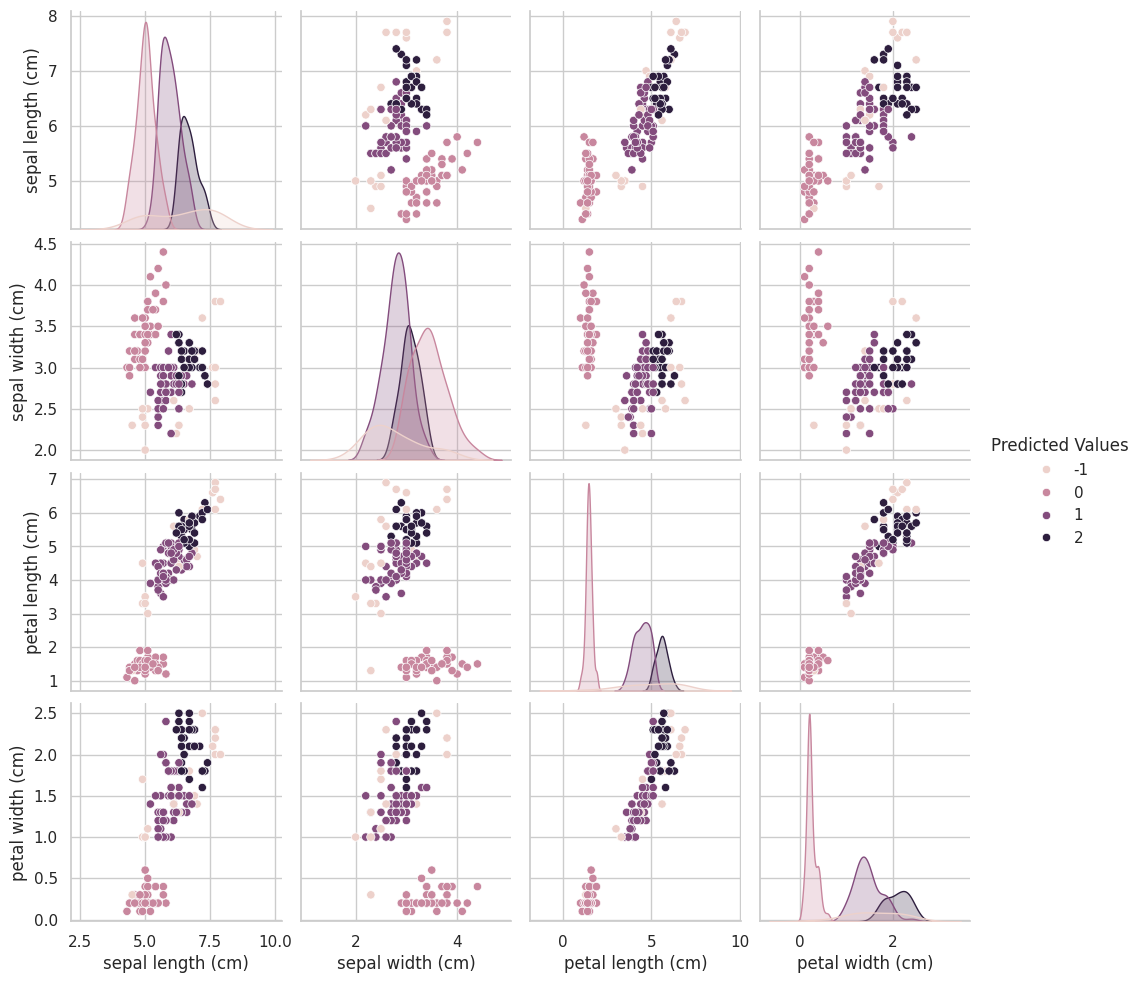

In [29]:
sns.pairplot(df, hue='Predicted Values')

In [30]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, db1.labels_)

score

np.float64(0.5759731146714389)

## 📊 Model Performance Summary

| Model / Configuration       | Silhouette Score |
|-----------------------------|------------------|
| KMeans (n_clusters=3)       | 0.6846           |
| DBSCAN                      | 0.5759           |


## Experiment - Testing Dbscan with hyperparameter tuning

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps1 = [0.2,0.3,0.4,0.5,0.6,0.7]
min_sample1 = [1,2,3,4,5,6,7]
lst1 = []

for x in eps1:
  for y in min_sample1:

    db1 = DBSCAN(eps=x, min_samples=y)

    db1.fit(X)

    db1.labels_

    # print(silhouette_score(X,db1.labels_))
    lst1.append(silhouette_score(X,db1.labels_))


<Axes: >

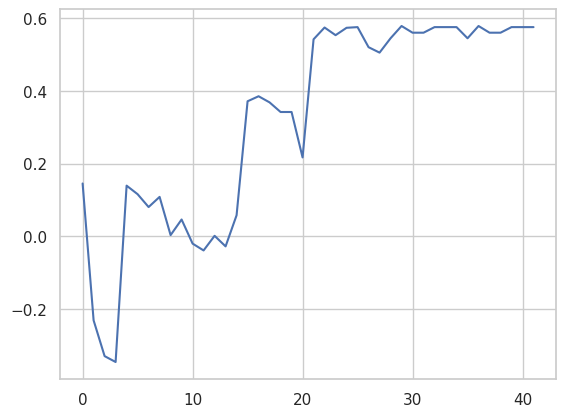

In [48]:
sns.lineplot(lst1)

In [50]:
# Even after tuning the eps and min_samples parameters of DBSCAN, the silhouette score does not improve significantly compared to the default configuration.